In [32]:
import os
import re
import cv2
import math
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from AAO_temp_help_func import *

0.612


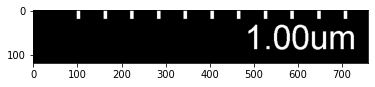

In [9]:
# Define the scale bar for all images in the directory 
img_1 = cv2.imread('img/1_1_q001.tif', cv2.IMREAD_GRAYSCALE)
thresh_row = cut_scale_bar(img_1)
length_pixel = dist_btw_scale_bar(thresh_row,255)
pixel_to_nm = translate_pixel_to_nm(length_pixel, 1E3)
print(pixel_to_nm)

In [10]:
directory = 'img/'

f_total = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        f_total.append(f)

In [11]:
hole_density_map = {}
avg_diam_map = {}
for img in f_total:
    original_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    cropped_image = original_img[0:1785, :]
    ret,thresh1 = cv2.threshold(cropped_image,80,255,cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8) 
    img_adaptive = cv2.erode(thresh1, kernel, iterations=2) 
    cluster_centers = find_clusters(img_adaptive)
    cluster_large_holes,num_holes = remove_small_holes(cluster_centers)
    cen_x,cen_y = annotate_image_with_labels(cluster_large_holes,original_img)
    hole_density_map[img] = num_holes

    cluster_size = []
    diameter = []

    for label,coords in cluster_large_holes.items():
        cluster_size.append(len(cluster_large_holes[label])/pixel_to_nm**2)
        diameter.append(2*math.sqrt(len(cluster_large_holes[label])/pixel_to_nm**2/3.14))

    avg_diam = np.average(diameter)
    avg_diam_map[img] = avg_diam
    
    







In [13]:
hole_density_map.items()

dict_items([('img/5_3_q003.tif', 274), ('img/1_1_q001.tif', 552), ('img/2_4_q004.tif', 592), ('img/3_1_q010.tif', 490)])

In [7]:
arr = np.zeros((2,2))

for i in range(len(arr)):
    for j in range(len(arr)):
        row = arr[i]
        row[j] = hole_density_map


{'img/5_3_q003.tif': 274,
 'img/1_1_q001.tif': 552,
 'img/2_4_q004.tif': 592,
 'img/3_1_q010.tif': 490}

In [48]:
hole_density_dict = {}
for img, value in hole_density_map.items():
    hole_density_dict[(int(img[6]),int(img[4]))] = value

hole_density_dict
    

{(3, 5): 274, (1, 1): 552, (4, 2): 592, (1, 3): 490}

In [47]:
len(hole_density_array[0])

5

In [54]:
hole_density_array = np.zeros((4,5))

for i in range(len(hole_density_array)):
    for j in range(len(hole_density_array[0])):
        #if (i+1,j+1) == (3,5):
        #    print(hole_density_dict[(3,5)])
        if (i+1,j+1) not in hole_density_dict:
            print("no")

            pass
        else:
            hole_density_array[i][j] = hole_density_dict[(i+1,j+1)]


hole_density_array

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


array([[552.,   0., 490.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 274.],
       [  0., 592.,   0.,   0.,   0.]])

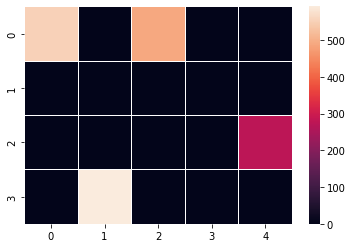

In [55]:
ax = sns.heatmap(hole_density_array, linewidth=0.5)
plt.show()